<a href="https://colab.research.google.com/github/Anwesha2357/Earthquake-Prediction/blob/main/2015_2025Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary libraries for data processing, visualization, and modeling
#These libraries re essential for tasks like loading data, plotting, model training, and evaluation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

#Import ML tools from scikit-learn
#These are used for splitting data, training models, and calculating error metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Import XGBoost for gradient boosting model training
import xgboost as xgb


In [2]:
# Load the Earthquake dataset from the specified Excel file
#This reads the dataset into a pandas Dataframe for analysis
df = pd.read_excel("/content/2015-2025earthquake_dataset.csv (1).xlsx", sheet_name='earthquake_dataset')

# Drop missing values
df.dropna(inplace=True)

In [3]:
# Feature and target selection to predict the impact score
features = ['Latitude', 'Longitude', 'Earthquake Magnitude', 'Depth (km)']
target = 'Impact Score'
X = df[features]
y = df[target]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16944 entries, 0 to 16943
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16944 non-null  datetime64[ns]
 1   Time (UTC)            16944 non-null  object        
 2   City                  16944 non-null  object        
 3   Country               16944 non-null  object        
 4   Latitude              16944 non-null  float64       
 5   Longitude             16944 non-null  float64       
 6   Earthquake Magnitude  16944 non-null  float64       
 7   Depth (km)            16944 non-null  float64       
 8   Impact Score          16944 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.2+ MB
None

Dataset Description:
                                Date      Latitude     Longitude  \
count                          16944  16944.000000  16944.000000

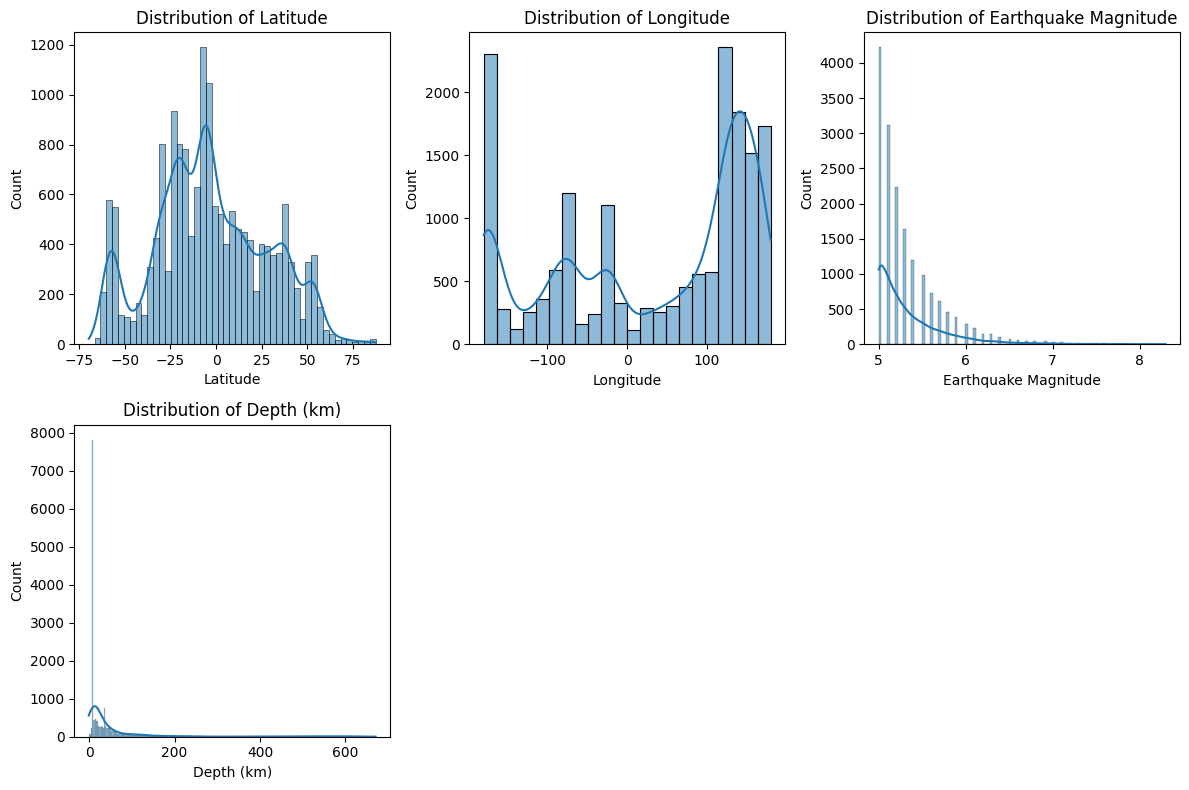

<Figure size 800x600 with 0 Axes>

In [4]:
#Print basic dataset info and statistics
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())

#Plot distributions for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
plt.show()

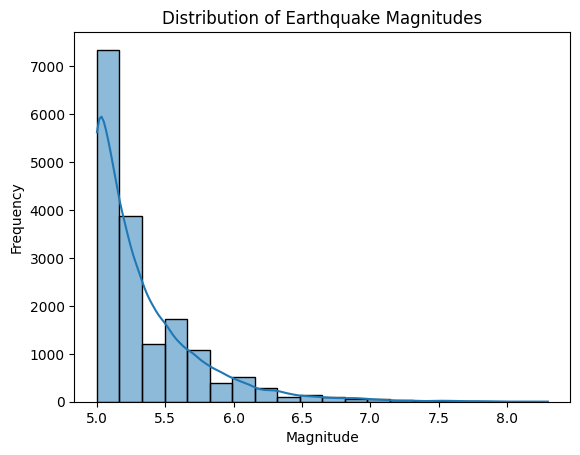

In [5]:
# Earthquake Magnitude Distribution
sns.histplot(df['Earthquake Magnitude'], kde=True, bins=20)
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

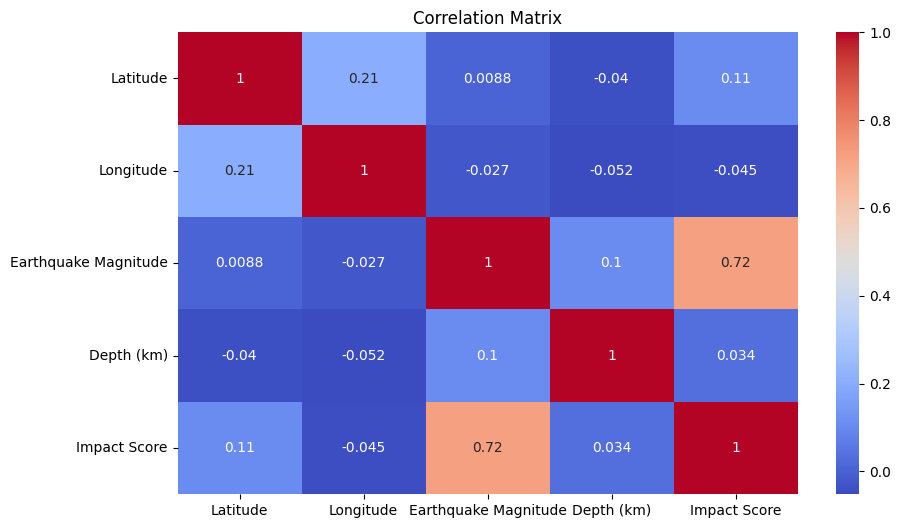

In [6]:
# Correlation Heatmap
#Show correlation between numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

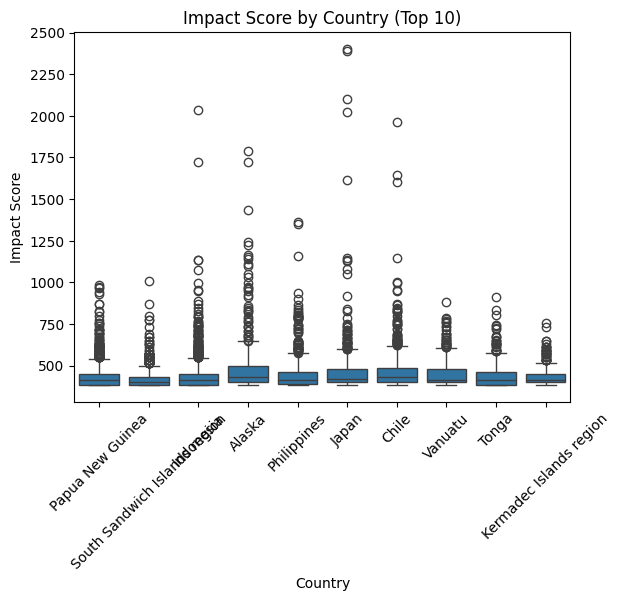

In [7]:
# Impact Score by Top Countries
top_countries = df['Country'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Country'].isin(top_countries)], x='Country', y='Impact Score')
plt.xticks(rotation=45)
plt.title("Impact Score by Country (Top 10)")
plt.show()

In [8]:
# Encode categorical data
le_country = LabelEncoder()
df['Country_Code'] = le_country.fit_transform(df['Country'])

# Feature matrix and target variable
X = df[['Latitude', 'Longitude', 'Earthquake Magnitude', 'Depth (km)', 'Country_Code']]
y = df['Impact Score']

In [9]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (13555, 5)
Testing data shape: (3389, 5)


In [10]:
# Train a Random Forest model with all CPU cores
model = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [11]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Random Forest Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


 Random Forest Evaluation:
MAE: 14.62
RMSE: 69.58
R^2 Score: 0.73


In [12]:
# Install if needed
!pip install XGBoost

import xgboost as xgb
import time

# Convert datasets into DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define training parameters for CPU and GPU
params_cpu = {
    'objective': 'reg:squarederror',
    'tree_method': 'auto',
    'eval_metric': 'mae'
}

params_gpu = {
    'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist',  # Uses GPU
    'eval_metric': 'mae'
}

# Train and time XGBoost on CPU
start_cpu = time.time()
model_cpu = xgb.train(params_cpu, dtrain, num_boost_round=100)
cpu_time = time.time() - start_cpu

# Train and time XGBoost on GPU
start_gpu = time.time()
model_gpu = xgb.train(params_gpu, dtrain, num_boost_round=100)
gpu_time = time.time() - start_gpu

print(f"CPU Training Time: {cpu_time:.2f} seconds")
print(f"GPU Training Time: {gpu_time:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:56:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


CPU Training Time: 0.15 seconds
GPU Training Time: 0.61 seconds


In [13]:
#Evaluate CPU and GPU models
y_pred_cpu = model_cpu.predict(dtest)
y_pred_gpu = model_gpu.predict(dtest)

# Evaluate the CPU-based XGBoost model using standard regression metrics
mae_cpu = mean_absolute_error(y_test, y_pred_cpu)
rmse_cpu = np.sqrt(mean_squared_error(y_test, y_pred_cpu))
r2_cpu = r2_score(y_test, y_pred_cpu)

# Evaluate the CPU-based XGBoost model using standard regression metrics
mae_gpu = mean_absolute_error(y_test, y_pred_gpu)
rmse_gpu = np.sqrt(mean_squared_error(y_test, y_pred_gpu))
r2_gpu = r2_score(y_test, y_pred_gpu)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:56:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [14]:
# 8. PRINT EVALUATION RESULTS for both CPU and GPU trained XGBoost models
#Helps compare their performance and speed

print("\n XGBoost CPU Evaluation:")
print(f"MAE: {mae_cpu:.2f}")
print(f"RMSE: {rmse_cpu:.2f}")
print(f"R²: {r2_cpu:.2f}")
print(f"Training Time: {cpu_time:.2f} sec")

print("\n XGBoost GPU Evaluation:")
print(f"MAE: {mae_gpu:.2f}")
print(f"RMSE: {rmse_gpu:.2f}")
print(f"R²: {r2_gpu:.2f}")
print(f"Training Time: {gpu_time:.2f} sec")





 XGBoost CPU Evaluation:
MAE: 15.64
RMSE: 71.49
R²: 0.71
Training Time: 0.15 sec

 XGBoost GPU Evaluation:
MAE: 15.54
RMSE: 68.76
R²: 0.73
Training Time: 0.61 sec


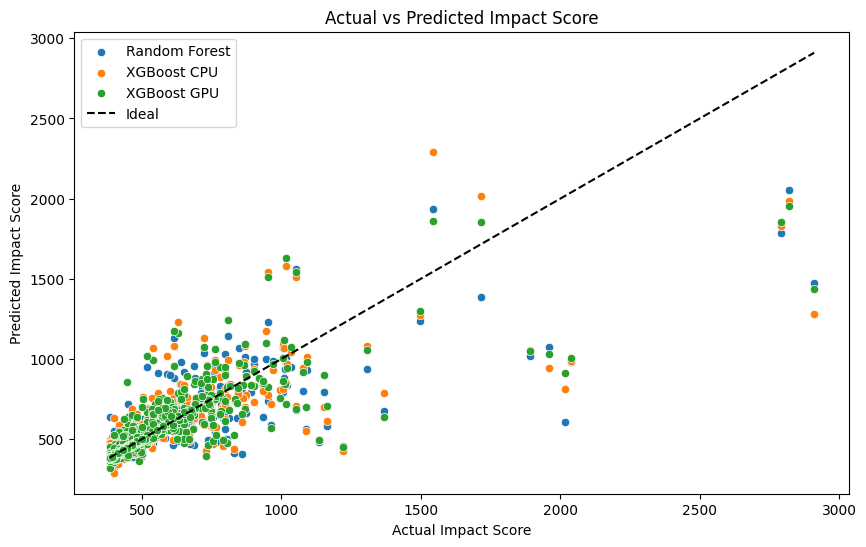

In [15]:
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Random Forest')
sns.scatterplot(x=y_test, y=y_pred_cpu, label='XGBoost CPU')
sns.scatterplot(x=y_test, y=y_pred_gpu, label='XGBoost GPU')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal')
plt.xlabel("Actual Impact Score")
plt.ylabel("Predicted Impact Score")
plt.title("Actual vs Predicted Impact Score")
plt.legend()
plt.show()
